# Five-percent difficulties

# Problems 1   
If we list all the natural numbers below 10 that are multiples of 3 or 5, we get 3, 5, 6 and 9. The sum of these multiples is 23.

Find the sum of all the multiples of 3 or 5 below 1000.

In [5]:
def multiples_3_5(n):
    _sum = 0
    for i in range(1,n//3+1):
        _sum += i*3 
        _sum += 0 if i*5 >= n  else i*5
        _sum -= 0 if i*15 >= n else i*15
    return _sum
print(multiples_3_5(1000))

233168


# Problems 2    
Each new term in the Fibonacci sequence is generated by adding the previous two terms. By starting with 1 and 2, the first 10 terms will be:

1, 2, 3, 5, 8, 13, 21, 34, 55, 89, ...

By considering the terms in the Fibonacci sequence whose values do not exceed four million, find the sum of the even-valued terms.

In [2]:
def sum_even_fib(n):
    pre = 1
    mid = 1
    post = 2
    sum_ = 0
    while post < n:
        if(post % 2 == 0):
#             print(post)
            
            sum_+= post
        temp = post + mid 
        pre = mid
        mid = post
        post = temp 
    return sum_ 
print(sum_even_fib(4*int(1e6)))

4613732


# Problems 3
The prime factors of 13195 are 5, 7, 13 and 29.

What is the largest prime factor of the number 600851475143 ?    

We can use segment of sieve of eratosthenes or Meissel-Lehmer algorithm



In [3]:
from math import *
def simple_sieve(n):
    sieve_of_eratosthenes = [True]*(n+1)
    sieve_of_eratosthenes[0] = False
    sieve_of_eratosthenes[1] = False
    
    for i in range(2,ceil(sqrt(n))+1):
        if sieve_of_eratosthenes[i] == 1:
            j = i**2
            while j <= n:
                if(sieve_of_eratosthenes[j]==1):
                    sieve_of_eratosthenes[j] = False
                j=j+i
    temp = [index for index,value in enumerate(sieve_of_eratosthenes) if value]
    return temp
def segment_sieve(n):
    limit = ceil(sqrt(n))
    prime = simple_sieve(limit)
    low = limit
    high = limit + limit
    # print(low)
    # print(prime)
    ct = 0
    while low < n:
        # print(ct)
        if(high>n):
            high = n
        mark = [True]*(limit+1)
        for i in range(len(prime)):
            low_limit = (low // prime[i])*prime[i]

            if low_limit < low :
                low_limit = low_limit+prime[i]
            # chose the start with prime[i]. if prime[i] is 2 => start with lowest divisible number in segment => 32 (2) or 33(3) or 35(5(
            for j in range(low_limit,high,prime[i]):
                mark[j-low] = False

        for i in range(low,high):
            if mark[i-low]:
                prime.append(i)
        low += limit
        high+= limit
        ct+=1
    return prime

def factor(n):
    # we only need n from 0 to sqrt of n.
    # if n cannot divisible for any number in primes array => it must be prime
    primes = segment_sieve(ceil(sqrt(n)+1))
    # print(len(primes))
#     print(primes)
    i=0
    prime = primes[i]
    factors = []
    while n != 1:
        try:
            if n % prime != 0:
                i+=1
                prime = primes[i]
            else:
                n = n//prime
                factors.append(prime)
        except:
            return factors+[n]
    return factors

# n = 600851475143
n=9
temp  = factor(n)
print(temp[-1])

3


# Problem 4
A palindromic number reads the same both ways. The largest palindrome made from the product of two 2-digit numbers is 9009 = 91 × 99.

Find the largest palindrome made from the product of two 3-digit numbers.   

When using brute force, remember to zoom in the range each loop

In [1]:
def is_palindrome(num):
    # print(num)
    reversed_num = str(num)[::-1]
    # print(reversed_num,num)
    return int(reversed_num) == int(num)

def find(no_digit):
    largest = 10**no_digit - 1
    smallest = 10 **(no_digit-1)
    largest_palindrome = 0
    smallest_number = smallest
    print(largest,smallest)
    i = largest
    # if we find some palindrome at ith loop and jth loop. And it must be largest jth of J loop. ith*jth => palindrome.
    # So we only need run the I loop down to j (not necessary to zero or )
    while i > smallest_number:
        # print(i)
        j=i
        while j > smallest_number:
            number = j * i
            if(is_palindrome(number) and number>largest_palindrome):
                largest_palindrome=number
#                 print(number)
                if(j > smallest_number):
                    smallest_number = j
                break
            j=j-1
        i= i -1
    return largest_palindrome
import time
start =time.time()
a = find(3)
end = time.time()
print(end-start)
print(a)

999 100
0.006649971008300781
906609


# Problem 5 
2520 is the smallest number that can be divided by each of the numbers from 1 to 10 without any remainder.

What is the smallest positive number that is evenly divisible by all of the numbers from 1 to 20?

First of all, it must be evenly divisible by all prime numbers from 2 to 20. 

After that, you can factor all numbers from 2 to 20 add some potential prime number to divisors-list 

In [2]:

def counting(input_seq):
    cts = []
    value = input_seq[0]
    ct = 0
    for element in input_seq:
        if (value == element):
            ct += 1
        else:
            cts.append([value, ct])
            value = element
            ct = 1
    cts.append([value, ct])
    return cts


def find(n):
    prod = 1
    lof = {}
    divisor = [[x, 1] for x in simple_sieve(n)]
    for num in divisor:
        lof[str(num[0])] = num[1]
    for i in range(2, n + 1):
        factors = counting(factor(i))
        for number, amount in factors:
            if (lof[str(number)] < amount):
                lof[str(number)] = amount
    return lof 
    for key in lof:
        value = int(key)
        times = int(lof[key])
        actual = value**times
        prod = prod*actual
        # print(prod)

    return prod

n = 20
print(find(n))

{'2': 4, '3': 2, '5': 1, '7': 1, '11': 1, '13': 1, '17': 1, '19': 1}


# Problem 6
The sum of the squares of the first ten natural numbers is,
$$1^2 + 2^2 + ... + 10^2 = 385$$

The square of the sum of the first ten natural numbers is,
$$(1 + 2 + ... + 10)^2 = 55^2 = 3025$$
Hence the difference between the sum of the squares of the first ten natural numbers and the square of the sum is .
$$3025 - 385 = 2640$$
Find the difference between the sum of the squares of the first one hundred natural numbers and the square of the sum.

In [5]:
n = 100


def sum_of_square(n):
    return sum(map(lambda x: x ** 2, range(0, n + 1)))


def square_of_sum(n):
    return sum(range(0, n + 1)) ** 2


a = sum_of_square(n)
b = square_of_sum(n)
print(b - a)


25164150


# Problem 7
By listing the first six prime numbers: 2, 3, 5, 7, 11, and 13, we can see that the 6th prime is 13.

What is the 10 001st prime number?

In [7]:
from math import *
def simple_sieve(n):
    sieve_of_eratosthenes = [True]*(n+1)
    sieve_of_eratosthenes[0] = False
    sieve_of_eratosthenes[1] = False
    
    for i in range(2,ceil(sqrt(n))+1):
        if sieve_of_eratosthenes[i] == 1:
            j = i**2
            while j <= n:
                if(sieve_of_eratosthenes[j]==1):
                    sieve_of_eratosthenes[j] = False
                j=j+i
    temp = [index for index,value in enumerate(sieve_of_eratosthenes) if value]
    return temp
def segment_sieve(n):
    limit = ceil(sqrt(n))
    prime = simple_sieve(limit)
    low = limit
    high = limit + limit
    # print(low)
    # print(prime)
    ct = 0
    while low < n:
        # print(ct)
        if(high>n):
            high = n
        mark = [True]*(limit+1)
        for i in range(len(prime)):
            low_limit = (low // prime[i])*prime[i]

            if low_limit < low :
                low_limit = low_limit+prime[i]
            # chose the start with prime[i]. if prime[i] is 2 => start with lowest divisible number in segment => 32 (2) or 33(3) or 35(5(
            for j in range(low_limit,high,prime[i]):
                mark[j-low] = False

        for i in range(low,high):
            if mark[i-low]:
                prime.append(i)
        low += limit
        high+= limit
        ct+=1
    return prime
primes = segment_sieve(int(1e6))
print(primes[10001-1])

104743


# Problem 8
The four adjacent digits in the 1000-digit number that have the greatest product are 9 × 9 × 8 × 9 = 5832.
```
73167176531330624919225119674426574742355349194934
96983520312774506326239578318016984801869478851843
85861560789112949495459501737958331952853208805511
12540698747158523863050715693290963295227443043557
66896648950445244523161731856403098711121722383113
62229893423380308135336276614282806444486645238749
30358907296290491560440772390713810515859307960866
70172427121883998797908792274921901699720888093776
65727333001053367881220235421809751254540594752243
52584907711670556013604839586446706324415722155397
53697817977846174064955149290862569321978468622482
83972241375657056057490261407972968652414535100474
82166370484403199890008895243450658541227588666881
16427171479924442928230863465674813919123162824586
17866458359124566529476545682848912883142607690042
24219022671055626321111109370544217506941658960408
07198403850962455444362981230987879927244284909188
84580156166097919133875499200524063689912560717606
05886116467109405077541002256983155200055935729725
71636269561882670428252483600823257530420752963450
```
Find the thirteen adjacent digits in the 1000-digit number that have the greatest product. What is the value of this product?

In [8]:
digits = '''
73167176531330624919225119674426574742355349194934
96983520312774506326239578318016984801869478851843
85861560789112949495459501737958331952853208805511
12540698747158523863050715693290963295227443043557
66896648950445244523161731856403098711121722383113
62229893423380308135336276614282806444486645238749
30358907296290491560440772390713810515859307960866
70172427121883998797908792274921901699720888093776
65727333001053367881220235421809751254540594752243
52584907711670556013604839586446706324415722155397
53697817977846174064955149290862569321978468622482
83972241375657056057490261407972968652414535100474
82166370484403199890008895243450658541227588666881
16427171479924442928230863465674813919123162824586
17866458359124566529476545682848912883142607690042
24219022671055626321111109370544217506941658960408
07198403850962455444362981230987879927244284909188
84580156166097919133875499200524063689912560717606
05886116467109405077541002256983155200055935729725
71636269561882670428252483600823257530420752963450
'''
def product_of_digits(n):
    n = str(n)
    # print(n)
    prod = 1
    for i in range(0,len(n)):
        prod = prod* int(n[i])
    return prod
def have_zero(n):
    n = str(n)
    return n.find('0') != -1

def thirteen(number,step):
    string_ = str(number).replace('\n','')
    max_value = 0
    for i in range(0,len(string_)-step + 1):
        sub_str = string_[i:i+step]
        if not have_zero(sub_str):
            max_value = max(max_value,product_of_digits(sub_str))
    return max_value


a = thirteen(digits,13)
print(a)

23514624000


# Problem 9 
A Pythagorean triplet is a set of three natural numbers, a < b < c, for which,

$$a^2 + b^2 = c^2$$
For example, $32 + 42 = 9 + 16 = 25 = 52$.

There exists exactly one Pythagorean triplet for which a + b + c = 1000.
Find the product abc.

In [ ]:
# Brute Force

# Problem 10

In [ ]:
primes = segment_sieve(int(2e6))
print(sum(primes))

# Problem 11
<p>In the 20×20 grid below, four numbers along a diagonal line have been marked in red.</p>
<p class="monospace center">
08 02 22 97 38 15 00 40 00 75 04 05 07 78 52 12 50 77 91 08<br />
49 49 99 40 17 81 18 57 60 87 17 40 98 43 69 48 04 56 62 00<br />
81 49 31 73 55 79 14 29 93 71 40 67 53 88 30 03 49 13 36 65<br />
52 70 95 23 04 60 11 42 69 24 68 56 01 32 56 71 37 02 36 91<br />
22 31 16 71 51 67 63 89 41 92 36 54 22 40 40 28 66 33 13 80<br />
24 47 32 60 99 03 45 02 44 75 33 53 78 36 84 20 35 17 12 50<br />
32 98 81 28 64 23 67 10 <span class="red"><b>26</b></span> 38 40 67 59 54 70 66 18 38 64 70<br />
67 26 20 68 02 62 12 20 95 <span class="red"><b>63</b></span> 94 39 63 08 40 91 66 49 94 21<br />
24 55 58 05 66 73 99 26 97 17 <span class="red"><b>78</b></span> 78 96 83 14 88 34 89 63 72<br />
21 36 23 09 75 00 76 44 20 45 35 <span class="red"><b>14</b></span> 00 61 33 97 34 31 33 95<br />
78 17 53 28 22 75 31 67 15 94 03 80 04 62 16 14 09 53 56 92<br />
16 39 05 42 96 35 31 47 55 58 88 24 00 17 54 24 36 29 85 57<br />
86 56 00 48 35 71 89 07 05 44 44 37 44 60 21 58 51 54 17 58<br />
19 80 81 68 05 94 47 69 28 73 92 13 86 52 17 77 04 89 55 40<br />
04 52 08 83 97 35 99 16 07 97 57 32 16 26 26 79 33 27 98 66<br />
88 36 68 87 57 62 20 72 03 46 33 67 46 55 12 32 63 93 53 69<br />
04 42 16 73 38 25 39 11 24 94 72 18 08 46 29 32 40 62 76 36<br />
20 69 36 41 72 30 23 88 34 62 99 69 82 67 59 85 74 04 36 16<br />
20 73 35 29 78 31 90 01 74 31 49 71 48 86 81 16 23 57 05 54<br />
01 70 54 71 83 51 54 69 16 92 33 48 61 43 52 01 89 19 67 48<br /></p>
<p>The product of these numbers is 26 × 63 × 78 × 14 = 1788696.</p>
<p>What is the greatest product of four adjacent numbers in the same direction (up, down, left, right, or diagonally) in the 20×20 grid?</p>

In [1]:
import numpy as np

grid_str = """
08 02 22 97 38 15 00 40 00 75 04 05 07 78 52 12 50 77 91 08
49 49 99 40 17 81 18 57 60 87 17 40 98 43 69 48 04 56 62 00
81 49 31 73 55 79 14 29 93 71 40 67 53 88 30 03 49 13 36 65
52 70 95 23 04 60 11 42 69 24 68 56 01 32 56 71 37 02 36 91
22 31 16 71 51 67 63 89 41 92 36 54 22 40 40 28 66 33 13 80
24 47 32 60 99 03 45 02 44 75 33 53 78 36 84 20 35 17 12 50
32 98 81 28 64 23 67 10 26 38 40 67 59 54 70 66 18 38 64 70
67 26 20 68 02 62 12 20 95 63 94 39 63 08 40 91 66 49 94 21
24 55 58 05 66 73 99 26 97 17 78 78 96 83 14 88 34 89 63 72
21 36 23 09 75 00 76 44 20 45 35 14 00 61 33 97 34 31 33 95
78 17 53 28 22 75 31 67 15 94 03 80 04 62 16 14 09 53 56 92
16 39 05 42 96 35 31 47 55 58 88 24 00 17 54 24 36 29 85 57
86 56 00 48 35 71 89 07 05 44 44 37 44 60 21 58 51 54 17 58
19 80 81 68 05 94 47 69 28 73 92 13 86 52 17 77 04 89 55 40
04 52 08 83 97 35 99 16 07 97 57 32 16 26 26 79 33 27 98 66
88 36 68 87 57 62 20 72 03 46 33 67 46 55 12 32 63 93 53 69
04 42 16 73 38 25 39 11 24 94 72 18 08 46 29 32 40 62 76 36
20 69 36 41 72 30 23 88 34 62 99 69 82 67 59 85 74 04 36 16
20 73 35 29 78 31 90 01 74 31 49 71 48 86 81 16 23 57 05 54
01 70 54 71 83 51 54 69 16 92 33 48 61 43 52 01 89 19 67 48
"""
grid_str = grid_str.replace('\n',' ').strip()
grid = np.array(grid_str.split(' '),dtype=int)
grid = grid.reshape((20,20))
def compute_diagonal(matrix):
    main = 1
    for i in range(len(matrix)):
        main*=matrix[i][i]
    counter = 1
    for i in range(len(matrix)):
        counter*=matrix[i][len(matrix)-1-i]
    return [main,counter]


def max_matrix(matrix):
    horizontal = np.array(list(map(np.prod, matrix)))
    vertical = np.array(list(map(np.prod, matrix.transpose())))
    diagonal = compute_diagonal(matrix)
    return max([*horizontal,*vertical,*diagonal])
def calculate(matrix,size):
    shape = matrix.shape
    if shape[0] != shape[1]:
        return None
    max_value = -10000000
    for i in range(0,len(matrix)-size+1):
        for j in range(0,len(matrix)+1 - size):
            max_value = max(max_value,max_matrix(matrix[i:i+size,j:j+size]))
    return max_value


value = calculate(grid,4)
print(value)

70600674


# Problem 12
<p>The sequence of triangle numbers is generated by adding the natural numbers. So the 7<sup>th</sup> triangle number would be 1 + 2 + 3 + 4 + 5 + 6 + 7 = 28. The first ten terms would be:</p>
<p class="center">1, 3, 6, 10, 15, 21, 28, 36, 45, 55, ...</p>
<p>Let us list the factors of the first seven triangle numbers:</p>
<blockquote class="monospace"><b> 1</b>: 1<br /><b> 3</b>: 1,3<br /><b> 6</b>: 1,2,3,6<br /><b>10</b>: 1,2,5,10<br /><b>15</b>: 1,3,5,15<br /><b>21</b>: 1,3,7,21<br /><b>28</b>: 1,2,4,7,14,28</blockquote>
<p>We can see that 28 is the first triangle number to have over five divisors.</p>
<p>What is the value of the first triangle number to have over five hundred divisors?</p>



In [5]:
# naive solution
# import math
# def triangular_num(n):
#     return int((n*(n+1))/2)
# def count_divisor(n):
#     cnt = 0
#     for i in range(1, (int)(math.sqrt(n)) + 1):
#         if (n % i == 0):
#             # divisor 
            
#             if (n // i == i):
#                 cnt = cnt + 1
#             else:  # Otherwise count both
#                 cnt = cnt + 2
#     return cnt
# def find(threshold):
#     index = 1
#     while True:
#         if(count_divisor(triangular_num(index))>threshold):
#             break
#         index+=1
#     return triangular_num(index)
# ans = find(500)
# print(ans)

# better solution that we can factor triangular number to primes. 
def triangular_num(n):
    return int((n*(n+1))/2)


def simple_sieve(n):
    sieve_of_eratosthenes = [True] * (n + 1)
    sieve_of_eratosthenes[0] = False
    sieve_of_eratosthenes[1] = False

    for i in range(2, ceil(sqrt(n)) + 1):
        if sieve_of_eratosthenes[i] == 1:
            j = i ** 2
            while j <= n:
                if (sieve_of_eratosthenes[j] == 1):
                    sieve_of_eratosthenes[j] = False
                j = j + i
    temp = [index for index, value in enumerate(sieve_of_eratosthenes) if value]
    return temp


def segment_sieve(n):
    limit = ceil(sqrt(n))
    prime = simple_sieve(limit)
    low = limit
    high = limit + limit
    # print(low)
    # print(prime)
    ct = 0
    while low < n:
        # print(ct)
        if (high > n):
            high = n
        mark = [True] * (limit + 1)
        for i in range(len(prime)):
            low_limit = (low // prime[i]) * prime[i]

            if low_limit < low:
                low_limit = low_limit + prime[i]
            # chose the start with prime[i]. if prime[i] is 2 => start with lowest divisible number in segment => 32 (2) or 33(3) or 35(5(
            for j in range(low_limit, high, prime[i]):
                mark[j - low] = False

        for i in range(low, high):
            if mark[i - low]:
                prime.append(i)
        low += limit
        high += limit
        ct += 1
    return prime

global primes
primes = segment_sieve(ceil(sqrt(10e10) + 1))

def factor(n):
    # we only need n from 0 to sqrt of n.
    # if n cannot divisible for any number in primes array => it must be prime
    # print(len(primes))
    #     print(primes)
    global primes
    i = 0
    prime = primes[i]
    factors = []
    while n != 1:
        try:
            if n % prime != 0:
                i += 1
                prime = primes[i]
            else:
                n = n // prime
                factors.append(prime)
        except:
            # n is prime
            return factors + [n]
    return factors


def count_divisor(n):
    factors = factor(n)
    factors = {x:factors.count(x)+1 for x in factors}
    no_divisors = 1

    for fact in factors:
        no_divisors*=factors[fact]
    return no_divisors

def find(threshold):
    index = 1
    while True:
        if count_divisor(triangular_num(index)) > threshold:
            return triangular_num(index)
        index+=1

print(find(500))

76576500


# Problem 13
Work out the first ten digits of the sum of the following one-hundred 50-digit numbers.

37107287533902102798797998220837590246510135740250  
46376937677490009712648124896970078050417018260538  
74324986199524741059474233309513058123726617309629   
91942213363574161572522430563301811072406154908250  
23067588207539346171171980310421047513778063246676  
89261670696623633820136378418383684178734361726757  
28112879812849979408065481931592621691275889832738  
44274228917432520321923589422876796487670272189318  
47451445736001306439091167216856844588711603153276  
70386486105843025439939619828917593665686757934951  
62176457141856560629502157223196586755079324193331  
64906352462741904929101432445813822663347944758178  
92575867718337217661963751590579239728245598838407  
58203565325359399008402633568948830189458628227828  
80181199384826282014278194139940567587151170094390  
35398664372827112653829987240784473053190104293586  
86515506006295864861532075273371959191420517255829  
71693888707715466499115593487603532921714970056938  
54370070576826684624621495650076471787294438377604  
53282654108756828443191190634694037855217779295145  
36123272525000296071075082563815656710885258350721  
45876576172410976447339110607218265236877223636045   
17423706905851860660448207621209813287860733969412  
81142660418086830619328460811191061556940512689692  
51934325451728388641918047049293215058642563049483  
62467221648435076201727918039944693004732956340691  
15732444386908125794514089057706229429197107928209  
55037687525678773091862540744969844508330393682126  
18336384825330154686196124348767681297534375946515  
80386287592878490201521685554828717201219257766954  
78182833757993103614740356856449095527097864797581  
16726320100436897842553539920931837441497806860984  
48403098129077791799088218795327364475675590848030  
87086987551392711854517078544161852424320693150332  
59959406895756536782107074926966537676326235447210  
69793950679652694742597709739166693763042633987085  
41052684708299085211399427365734116182760315001271  
65378607361501080857009149939512557028198746004375  
35829035317434717326932123578154982629742552737307  
94953759765105305946966067683156574377167401875275  
88902802571733229619176668713819931811048770190271  
25267680276078003013678680992525463401061632866526  
36270218540497705585629946580636237993140746255962  
24074486908231174977792365466257246923322810917141  
91430288197103288597806669760892938638285025333403  
34413065578016127815921815005561868836468420090470  
23053081172816430487623791969842487255036638784583  
11487696932154902810424020138335124462181441773470  
63783299490636259666498587618221225225512486764533  
67720186971698544312419572409913959008952310058822  
95548255300263520781532296796249481641953868218774  
76085327132285723110424803456124867697064507995236  
37774242535411291684276865538926205024910326572967  
23701913275725675285653248258265463092207058596522  
29798860272258331913126375147341994889534765745501  
18495701454879288984856827726077713721403798879715  
38298203783031473527721580348144513491373226651381  
34829543829199918180278916522431027392251122869539  
40957953066405232632538044100059654939159879593635  
29746152185502371307642255121183693803580388584903  
41698116222072977186158236678424689157993532961922  
62467957194401269043877107275048102390895523597457  
23189706772547915061505504953922979530901129967519  
86188088225875314529584099251203829009407770775672  
11306739708304724483816533873502340845647058077308  
82959174767140363198008187129011875491310547126581  
97623331044818386269515456334926366572897563400500  
42846280183517070527831839425882145521227251250327  
55121603546981200581762165212827652751691296897789   
32238195734329339946437501907836945765883352399886   
75506164965184775180738168837861091527357929701337   
62177842752192623401942399639168044983993173312731   
32924185707147349566916674687634660915035914677504   
99518671430235219628894890102423325116913619626622   
73267460800591547471830798392868535206946944540724  
76841822524674417161514036427982273348055556214818  
97142617910342598647204516893989422179826088076852  
87783646182799346313767754307809363333018982642090  
10848802521674670883215120185883543223812876952786  
71329612474782464538636993009049310363619763878039  
62184073572399794223406235393808339651327408011116  
66627891981488087797941876876144230030984490851411  
60661826293682836764744779239180335110989069790714  
85786944089552990653640447425576083659976645795096  
66024396409905389607120198219976047599490197230297  
64913982680032973156037120041377903785566085089252   
16730939319872750275468906903707539413042652315011  
94809377245048795150954100921645863754710598436791  
78639167021187492431995700641917969777599028300699  
15368713711936614952811305876380278410754449733078  
40789923115535562561142322423255033685442488917353   
44889911501440648020369068063960672322193204149535  
41503128880339536053299340368006977710650566631954  
81234880673210146739058568557934581403627822703280  
82616570773948327592232845941706525094512325230608  
22918802058777319719839450180888072429661980811197   
77158542502016545090413245809786882778948721859617  
72107838435069186155435662884062257473692284509516  
20849603980134001723930671666823555245252804609722   
53503534226472524250874054075591789781264330331690  

In [2]:
given_number = """
37107287533902102798797998220837590246510135740250
46376937677490009712648124896970078050417018260538
74324986199524741059474233309513058123726617309629
91942213363574161572522430563301811072406154908250
23067588207539346171171980310421047513778063246676
89261670696623633820136378418383684178734361726757
28112879812849979408065481931592621691275889832738
44274228917432520321923589422876796487670272189318
47451445736001306439091167216856844588711603153276
70386486105843025439939619828917593665686757934951
62176457141856560629502157223196586755079324193331
64906352462741904929101432445813822663347944758178
92575867718337217661963751590579239728245598838407
58203565325359399008402633568948830189458628227828
80181199384826282014278194139940567587151170094390
35398664372827112653829987240784473053190104293586
86515506006295864861532075273371959191420517255829
71693888707715466499115593487603532921714970056938
54370070576826684624621495650076471787294438377604
53282654108756828443191190634694037855217779295145
36123272525000296071075082563815656710885258350721
45876576172410976447339110607218265236877223636045
17423706905851860660448207621209813287860733969412
81142660418086830619328460811191061556940512689692
51934325451728388641918047049293215058642563049483
62467221648435076201727918039944693004732956340691
15732444386908125794514089057706229429197107928209
55037687525678773091862540744969844508330393682126
18336384825330154686196124348767681297534375946515
80386287592878490201521685554828717201219257766954
78182833757993103614740356856449095527097864797581
16726320100436897842553539920931837441497806860984
48403098129077791799088218795327364475675590848030
87086987551392711854517078544161852424320693150332
59959406895756536782107074926966537676326235447210
69793950679652694742597709739166693763042633987085
41052684708299085211399427365734116182760315001271
65378607361501080857009149939512557028198746004375
35829035317434717326932123578154982629742552737307
94953759765105305946966067683156574377167401875275
88902802571733229619176668713819931811048770190271
25267680276078003013678680992525463401061632866526
36270218540497705585629946580636237993140746255962
24074486908231174977792365466257246923322810917141
91430288197103288597806669760892938638285025333403
34413065578016127815921815005561868836468420090470
23053081172816430487623791969842487255036638784583
11487696932154902810424020138335124462181441773470
63783299490636259666498587618221225225512486764533
67720186971698544312419572409913959008952310058822
95548255300263520781532296796249481641953868218774
76085327132285723110424803456124867697064507995236
37774242535411291684276865538926205024910326572967
23701913275725675285653248258265463092207058596522
29798860272258331913126375147341994889534765745501
18495701454879288984856827726077713721403798879715
38298203783031473527721580348144513491373226651381
34829543829199918180278916522431027392251122869539
40957953066405232632538044100059654939159879593635
29746152185502371307642255121183693803580388584903
41698116222072977186158236678424689157993532961922
62467957194401269043877107275048102390895523597457
23189706772547915061505504953922979530901129967519
86188088225875314529584099251203829009407770775672
11306739708304724483816533873502340845647058077308
82959174767140363198008187129011875491310547126581
97623331044818386269515456334926366572897563400500
42846280183517070527831839425882145521227251250327
55121603546981200581762165212827652751691296897789
32238195734329339946437501907836945765883352399886
75506164965184775180738168837861091527357929701337
62177842752192623401942399639168044983993173312731
32924185707147349566916674687634660915035914677504
99518671430235219628894890102423325116913619626622
73267460800591547471830798392868535206946944540724
76841822524674417161514036427982273348055556214818
97142617910342598647204516893989422179826088076852
87783646182799346313767754307809363333018982642090
10848802521674670883215120185883543223812876952786
71329612474782464538636993009049310363619763878039
62184073572399794223406235393808339651327408011116
66627891981488087797941876876144230030984490851411
60661826293682836764744779239180335110989069790714
85786944089552990653640447425576083659976645795096
66024396409905389607120198219976047599490197230297
64913982680032973156037120041377903785566085089252
16730939319872750275468906903707539413042652315011
94809377245048795150954100921645863754710598436791
78639167021187492431995700641917969777599028300699
15368713711936614952811305876380278410754449733078
40789923115535562561142322423255033685442488917353
44889911501440648020369068063960672322193204149535
41503128880339536053299340368006977710650566631954
81234880673210146739058568557934581403627822703280
82616570773948327592232845941706525094512325230608
22918802058777319719839450180888072429661980811197
77158542502016545090413245809786882778948721859617
72107838435069186155435662884062257473692284509516
20849603980134001723930671666823555245252804609722
53503534226472524250874054075591789781264330331690
"""
def solve(input_number):
    numbers = input_number.split('\n')
    numbers = [x for x in numbers if x != '']
    numbers = [x for x in map(int,numbers) ]
    total = sum(numbers)
    return int(str(total)[:10])
a = solve(given_number)
print(a)


5537376230


# Problem 14
The following iterative sequence is defined for the set of positive integers:

$n \rightarrow n/2$ (n is even)   
$n \rightarrow 3n + 1$ (n is odd)   

Using the rule above and starting with 13, we generate the following sequence:

$13 \rightarrow 40 \rightarrow 20 \rightarrow 10 \rightarrow 5 \rightarrow 16 \rightarrow 8 \rightarrow 4 \rightarrow 2 \rightarrow 1$   
It can be seen that this sequence (starting at 13 and finishing at 1) contains 10 terms. Although it has not been proved yet (Collatz Problem), it is thought that all starting numbers finish at 1.
 
Which starting number, under one million, produces the longest chain?

**NOTE**: Once the chain starts the terms are allowed to go above one million.


In [4]:
def collazt(threshold=int(1e6)):
    """
    using this function to calculate number of collazt sequence elements starting at k (k is from 0 to threshold)
    using dymanic programing to store number of collazt-sequence-elements starting at k (caching)
    :param threshold: 
    :return: 
    """
    counting = [-1 for _ in range(threshold)]

    for i in range(1,threshold):
        collazt_number = i
        count = 0
        # print('---------------------')
        # print('{} is processing'.format(i))
        while collazt_number != 1:
            # print(collazt_number)
            collazt_number = collazt_number//2 if collazt_number% 2 ==0 else collazt_number*3 + 1
            if collazt_number < threshold and collazt_number < i:
                if counting[collazt_number] != -1:
                    # print('sub',collazt_number)
                    count = counting[collazt_number] + count
                    break
            count+=1
        count+=1
        # print('counting {} is {}'.format(i,count))
        counting[i] = count
    return counting

answ = collazt()
print(answ.index(max(answ)))

837799


# Problem 15
<p>Starting in the top left corner of a 2×2 grid, and only being able to move to the right and down, there are exactly 6 routes to the bottom right corner.</p>
<div class="center">
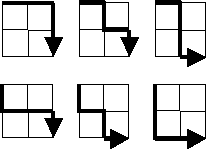</div>
<p>How many such routes are there through a 20×20 grid?</p>
<p> we can using variations with repetions to solve this problem </p>
<p> we easily recognize that we need size(2) Down move and size(2) Left move to finish the game(orders are not important). 
    But when we apply variation formula, it mustn't have any repetion. <p>

In [2]:
from math import *
def grid(size=2):
    variations = factorial(2*size)//(factorial(size)*factorial(size))
    return variations
grid(20)

137846528820

# Problem 16
<p>2<sup>15</sup> = 32768 and the sum of its digits is 3 + 2 + 7 + 6 + 8 = 26.</p>
<p>What is the sum of the digits of the number 2<sup>1000</sup>?</p>

In [3]:
def sum_of_2(degree = 1000):
    return sum(map(int,str(2**degree)))
a = sum_of_2()
print(a)

1366


# Problem 17


# Problem 18


# Problem 19


# Problem 20